In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ise_compiled_data.csv")

df.head()

,State,Road_ID,Name,Type,Latitude,Longitude,Surface,Lane,Bulk_Density (g/cm³),Clay (%),...,Silt (%),pH,Avg_Temperature (°C),Annual_Precipitation (mm),Approximate Length (km),Surface material,Estimated_CBR (%),ADT (veh/day),ESAL (20yr),Pavement_Thickness (mm)
0,Abia,204468394,Aba - Ikot Ekpene Road,trunk,5.112276,7.428424,paved,2,1.32,16.8,...,8.9,5.2,25.71,6.34,NaN,Unknown/Under rehabilitation,21.0,20000,39420000,316.0
1,Abia,204587925,Enugu - Port Harcourt Expressway,trunk,5.303525,7.392833,paved,2,1.30,16.8,...,7.9,5.3,25.51,4.90,51.6,Hot Mix Asphalt,21.2,20000,39420000,315.6
2,Adamawa,185873548,Adamawa_Road_1,trunk,10.338823,13.162036,paved,2,1.40,21.4,...,26.7,6.7,26.38,2.65,NaN,Unknown/Under rehabilitation,13.8,20000,39420000,335.8
3,Adamawa,185873562,Adamawa_Road_4,trunk,10.284543,13.102667,paved,2,1.42,23.4,...,28.7,6.6,26.38,2.65,NaN,Unknown/Under rehabilitation,12.3,20000,39420000,342.9
4,Adamawa,185873572,Adamawa_Road_6,trunk,10.913132,13.640085,paved,2,1.45,16.0,...,23.5,6.3,27.09,1.92,NaN,Unknown/Under rehabilitation,17.7,20000,39420000,323.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      210 non-null    object 
 1   Road_ID                    210 non-null    int64  
 2   Name                       210 non-null    object 
 3   Type                       210 non-null    object 
 4   Latitude                   210 non-null    float64
 5   Longitude                  210 non-null    float64
 6   Surface                    210 non-null    object 
 7   Lane                       210 non-null    int64  
 8   Bulk_Density (g/cm³)       210 non-null    float64
 9   Clay (%)                   210 non-null    float64
 10  Sand (%)                   210 non-null    float64
 11  Silt (%)                   210 non-null    float64
 12  pH                         210 non-null    float64
 13  Avg_Temperature (°C)       210 non-null    float64

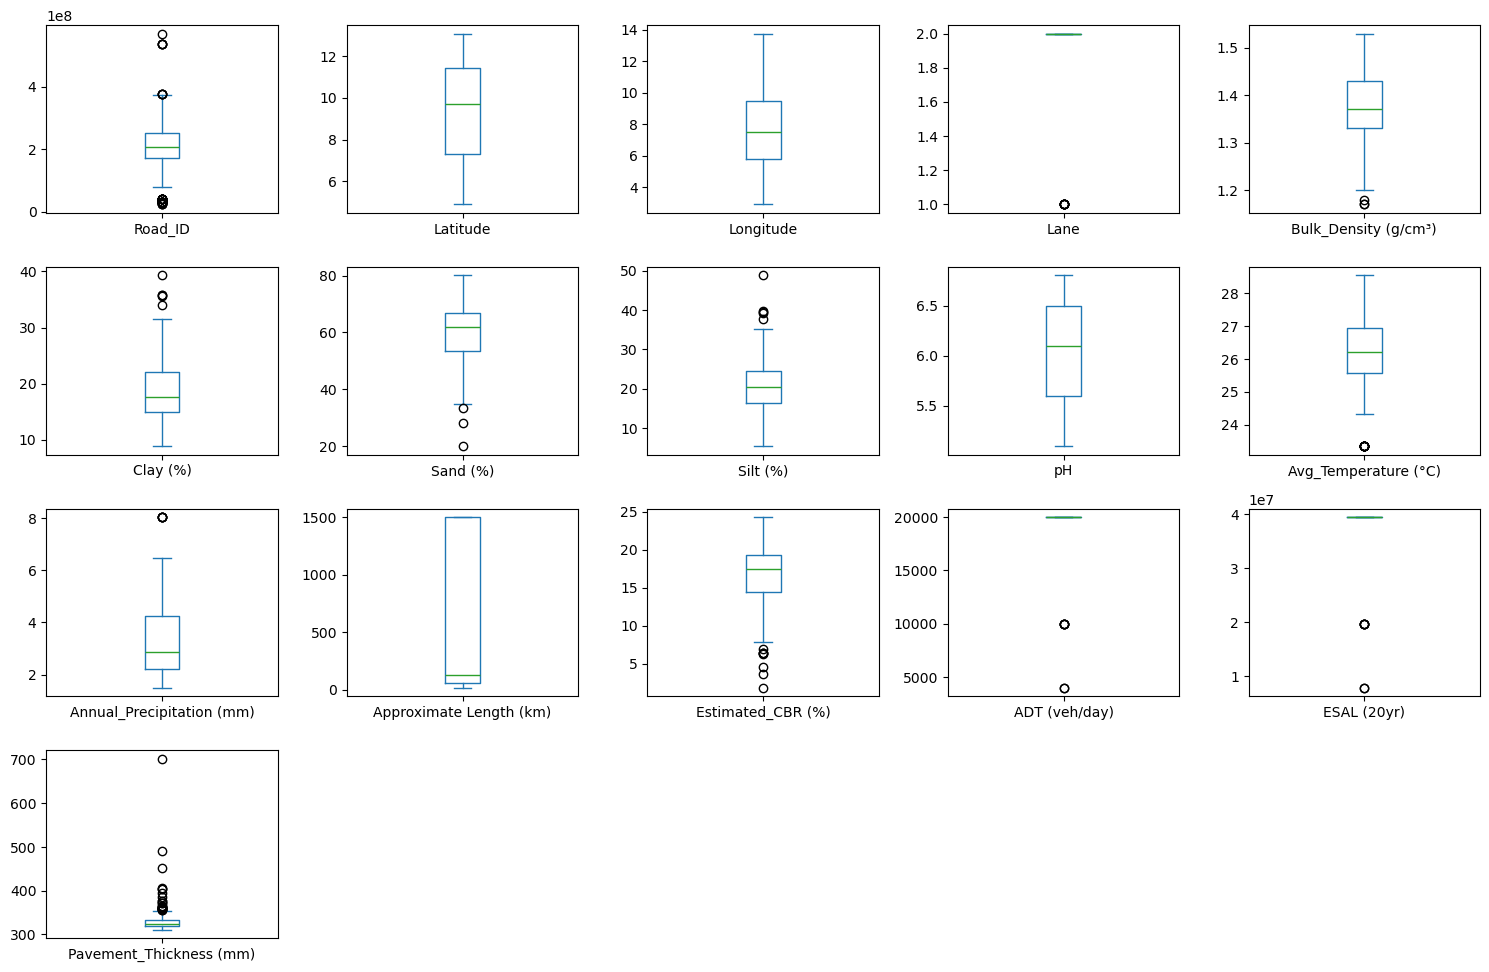

In [4]:
# Boxplots for outlier detection
num_cols = df.select_dtypes(include=['float64','int64']).columns
df[num_cols].plot(kind='box', subplots=True, layout=(5,5), figsize=(15,12))
plt.tight_layout()
plt.show()

C:\Users\Ukpoweh Gift\AppData\Local\Temp\ipykernel_40796\2957024556.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Surface material"], order=df["Surface material"].value_counts().index, palette="Set2")


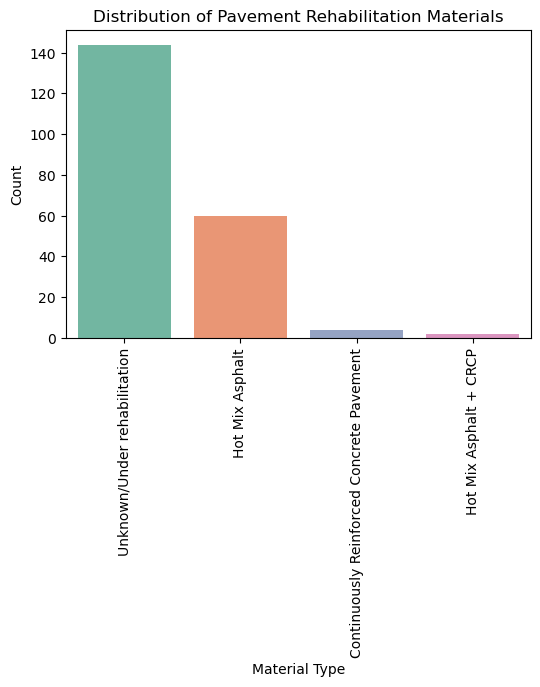

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df["Surface material"], order=df["Surface material"].value_counts().index, palette="Set2")
plt.title("Distribution of Pavement Rehabilitation Materials")
plt.xlabel("Material Type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.savefig("target.png", dpi=300)
plt.show()


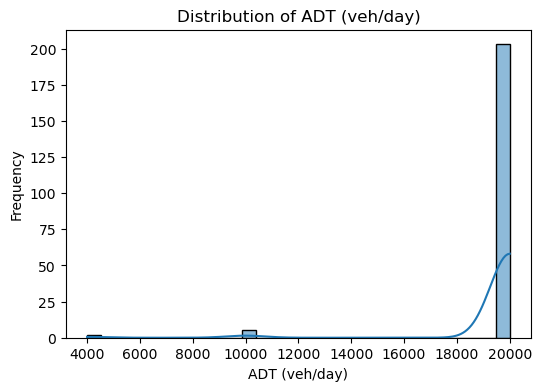

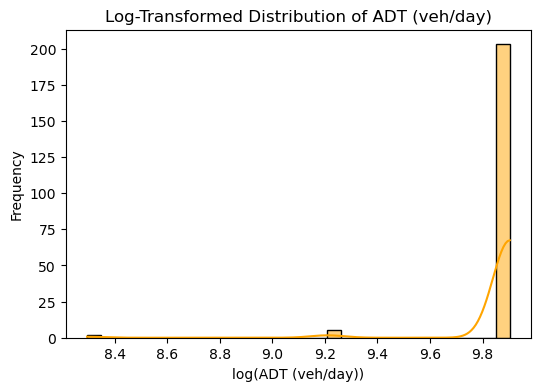

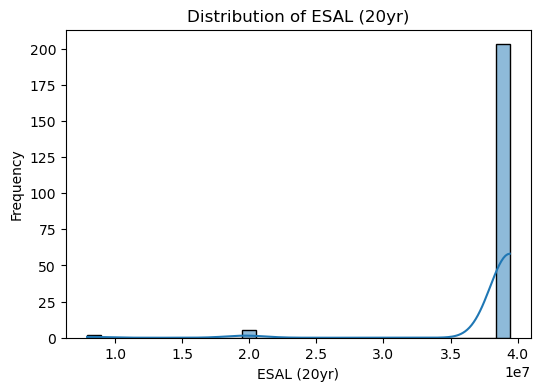

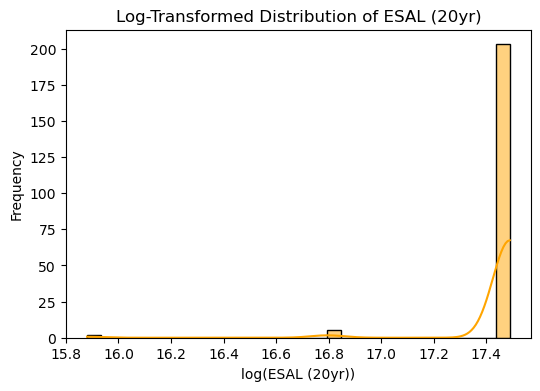

In [6]:
traffic_cols = ["ADT (veh/day)", "ESAL (20yr)"]
for col in traffic_cols:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.savefig("distribution.png", dpi=300)
        plt.show()

        # Log-transformed version
        plt.figure(figsize=(6,4))
        sns.histplot(np.log1p(df[col].dropna()), bins=30, kde=True, color="orange")
        plt.title(f"Log-Transformed Distribution of {col}")
        plt.xlabel(f"log({col})")
        plt.ylabel("Frequency")
        plt.savefig("logdistribution.png", dpi=300)
        plt.show()


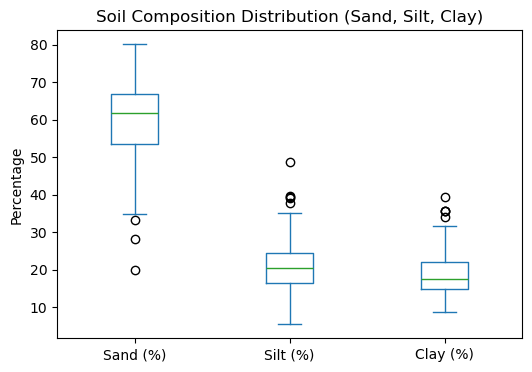

C:\Users\Ukpoweh Gift\AppData\Local\Temp\ipykernel_40796\2114540188.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["dominant_texture"], palette="coolwarm")


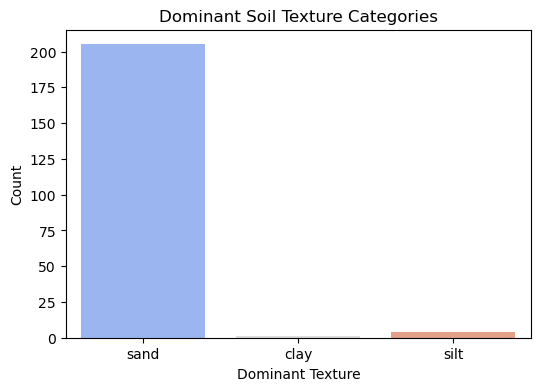

In [7]:
soil_cols = ["Sand (%)", "Silt (%)", "Clay (%)"]

if set(soil_cols).issubset(df.columns):
    df[soil_cols].plot(kind="box", figsize=(6,4))
    plt.title("Soil Composition Distribution (Sand, Silt, Clay)")
    plt.ylabel("Percentage")
    plt.savefig("soli.png", dpi=300)
    plt.show()

    # Dominant soil texture counts
    df["dominant_texture"] = np.where(
        df["Clay (%)"] > df[["Sand (%)","Silt (%)"]].max(axis=1), "clay",
        np.where(df["Sand (%)"] > df[["Clay (%)","Silt (%)"]].max(axis=1), "sand", "silt")
    )
    plt.figure(figsize=(6,4))
    sns.countplot(x=df["dominant_texture"], palette="coolwarm")
    plt.title("Dominant Soil Texture Categories")
    plt.xlabel("Dominant Texture")
    plt.ylabel("Count")
    plt.savefig("dominant.png", dpi=300)
    plt.show()


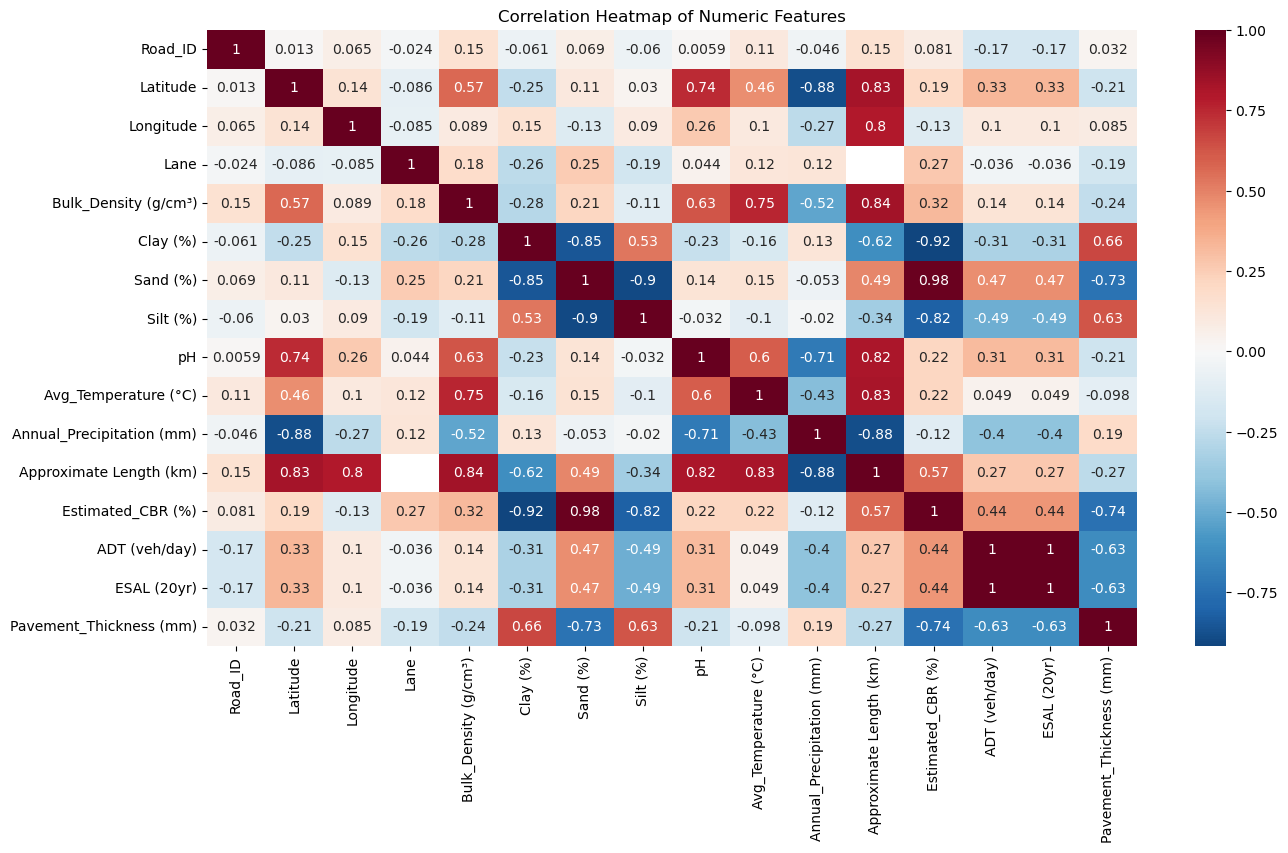

In [8]:
plt.figure(figsize=(15,8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap="RdBu_r", center=0)
plt.title("Correlation Heatmap of Numeric Features")
plt.savefig("correlation.png", dpi=300)
plt.show()


## Training

In [9]:
#!pip install tensorflow
#!pip install catboost
#!pip install xgboost
#!pip install lightgbm

^C
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.4 MB 319.2 kB/s eta 0:05:20
   ---------------------------------------- 0.5/102.4 MB 319.2 kB/s eta 0:05:20
   ---------------------------------------- 0.5/102.4 MB 319.2 kB/s eta 0:05:20
   ---------------------------------------- 0.8/102.4 MB 342.5 kB/s eta 0:04:57
   ---------------------------------------- 0.8/102.4 MB 342.5 kB/s eta 0:04:57
   --------------------------

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Ukpoweh Gift\\AppData\\Local\\Temp\\pip-unpack-gxm5ljfj\\catboost-1.2.8-cp313-cp313-win_amd64.whl'
Consider using the `--user` option or check the permissions.

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Ukpoweh Gift\\AppData\\Local\\Temp\\pip-unpack-kk04ghs4\\tensorflow-2.20.0-cp313-cp313-win_amd64.whl'
Consider using the `--user` option or check the permissions.



   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/332.0 MB 1.8 MB/s eta 0:03:08
   ---------------------------------------- 1.0/332.0 MB 1.7 MB/s eta 0:03:12
   ---------------------------------------- 1.0/332.0 MB 1.7 MB/s eta 0:03:12
   ---------------------------------------- 1.3/332.0 MB 1.2 MB/s eta 0:04:43
   ---------------------------------------- 1.3/332.0 MB 1.2 MB/s eta 0:04:43
   ---------------------------------------- 1.3/332.0 MB 1.2 MB/s eta 0:04:43
   ---------------------------------------- 2.1/332.0 MB 1.2 MB/s eta 0:04:42
   ---------------------------------------- 2.4/332.0 MB 1.3 MB/s eta 0:04:16
   ------------------

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Ukpoweh Gift\\AppData\\Local\\Temp\\pip-unpack-kfsxg9ll\\xgboost-3.0.5-py3-none-win_amd64.whl'
Consider using the `--user` option or check the permissions.



   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -----------------------

In [ ]:
# pipeline_preprocessing_training_classification.py
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, balanced_accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# -----------------------------
# Settings - update these
DATA_PATH = "/content/drive/MyDrive/ise_compiled_data.csv"  # path to CSV
TARGET_NAME_OVERRIDE = "surface_material"  # column name of target if you want to force
RANDOM_STATE = 42
MODEL_DIR = "models_classification"
os.makedirs(MODEL_DIR, exist_ok=True)
# -----------------------------

# ---------- Helpers ----------
def sanitize_columns(df):
    df = df.copy()
    df.columns = [
        (c.strip().lower()
           .replace(" ", "_")
           .replace("(", "")
           .replace(")", "")
           .replace("%", "pct")
           .replace("/", "_"))
        for c in df.columns
    ]
    return df

def detect_target(df):
    if TARGET_NAME_OVERRIDE and TARGET_NAME_OVERRIDE in df.columns:
        return TARGET_NAME_OVERRIDE
    # fallback
    for cand in ["surface_material", "material", "rehab_material"]:
        if cand in df.columns:
            return cand
    raise ValueError("Target column not found - set TARGET_NAME_OVERRIDE properly.")

def classification_metrics(y_true, y_pred, labels):
    acc = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, target_names=labels)
    print(f"Accuracy: {acc:.3f}")
    print("Classification Report:\n", report)
    return {"Accuracy": acc}

# ---------- Load ----------
df = pd.read_csv(DATA_PATH)
df = sanitize_columns(df)
target_col = detect_target(df)
print("Detected target:", target_col)

# Filter out unknown/irrelevant classes
df = df[df[target_col] != "Unknown/Under rehabilitation"]

# Drop rows missing target
df = df.dropna(subset=[target_col]).reset_index(drop=True)

# ---------- Feature Selection ----------
exclude_prefixes = ["road_id", "name", "id"]
exclude_cols = [c for c in df.columns if any(c.startswith(p) for p in exclude_prefixes)]
if "latitude" in exclude_cols: exclude_cols.remove("latitude")
if "longitude" in exclude_cols: exclude_cols.remove("longitude")

candidate_features = [c for c in df.columns if c != target_col and c not in exclude_cols]
print("Using candidate features:", candidate_features)

X = df[candidate_features].copy()
y = df[target_col].copy()

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)
labels = le.classes_ # Refit LabelEncoder on the filtered data

# ---------- Simple Feature Engineering ----------
# log transform heavy-tailed traffic features
for f in ["adt", "adt_veh", "estimatedadt", "estimated_adt", "esal_20yr", "estimated_ad"]:
    if f in X.columns:
        new = f"{f}_log"
        X[new] = np.log1p(X[f])
        candidate_features.append(new)

# Add soil dominant texture if available
if {"clay_pct", "sand_pct", "silt_pct"}.issubset(set(X.columns)):
    X["dominant_texture"] = np.where(
        X["clay_pct"] > X[["sand_pct","silt_pct"]].max(axis=1), "clay",
        np.where(X["sand_pct"] > X[["clay_pct","silt_pct"]].max(axis=1), "sand", "silt")
    )
    candidate_features.append("dominant_texture")

X = X[candidate_features]

# ---------- Train/Test Split ----------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=RANDOM_STATE,
                                                    stratify=y)
print("Train/test shapes:", X_train.shape, X_test.shape)

# ---------- Preprocessing ----------
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = [c for c in X.columns if c not in numeric_features]

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="unknown")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# ---------- Models ----------
pipe_lr = Pipeline([("pre", preprocessor),
                    ("lr", LogisticRegression(max_iter=1000, random_state=RANDOM_STATE))])

pipe_rf = Pipeline([("pre", preprocessor),
                    ("rf", RandomForestClassifier(n_estimators=300, random_state=RANDOM_STATE))])

pipe_xgb = Pipeline([("pre", preprocessor),
                     ("xgb", XGBClassifier(n_estimators=500, learning_rate=0.05,
                                           random_state=RANDOM_STATE, use_label_encoder=False,
                                           eval_metric="mlogloss"))])

pipe_light = Pipeline([("pre", preprocessor),
                       ("light", LGBMClassifier(n_estimators=300, learning_rate=0.05,
                                                random_state=RANDOM_STATE))])

pipe_cat = Pipeline([("pre", preprocessor),
                     ("cat", CatBoostClassifier(iterations=300, learning_rate=0.05,
                                                depth=6, verbose=0, random_state=RANDOM_STATE))])

pipe_ann = Pipeline([("pre", preprocessor),
                     ("ann", MLPClassifier(hidden_layer_sizes=(128, 64),
                                            max_iter=500, random_state=RANDOM_STATE))])

# ---------- Evaluate baseline models ----------
def fit_and_eval(pipe, name, le):
    """
    Train, evaluate, and display metrics for a classification model.
    Handles imbalanced data using weighted and balanced metrics.
    """
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    # Classes present in test set
    unique_classes = np.unique(y_test)
    labels_present = le.inverse_transform(unique_classes)

    # Metrics
    acc = accuracy_score(y_test, preds)
    bal_acc = balanced_accuracy_score(y_test, preds)
    f1_w = f1_score(y_test, preds, average="weighted")

    report = classification_report(y_test, preds, target_names=labels_present, digits=3)

    print(f"\n{name} Results")
    print(f"Accuracy: {acc:.3f}")
    print(f"Balanced Accuracy: {bal_acc:.3f}")
    print(f"Weighted F1-score: {f1_w:.3f}")
    print("Classification Report:\n", report)

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds, labels=unique_classes)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels_present, yticklabels=labels_present)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return pipe, {
        "Accuracy": acc,
        "Balanced_Accuracy": bal_acc,
        "Weighted_F1": f1_w
    }

results = {}
print("\nTraining baseline models...")
pipe_lr, m_lr = fit_and_eval(pipe_lr, "LogisticRegression", le)
results["LogisticRegression"] = m_lr

pipe_rf, m_rf = fit_and_eval(pipe_rf, "RandomForest", le)
results["RandomForest"] = m_rf

pipe_xgb, m_xgb = fit_and_eval(pipe_xgb, "XGBoost", le)
results["XGBoost"] = m_xgb

pipe_light, m_light = fit_and_eval(pipe_light, "LightGBM", le)
results["LightGBM"] = m_light

pipe_cat, m_cat = fit_and_eval(pipe_cat, "CatBoost", le)
results["CatBoost"] = m_cat

pipe_ann, m_ann = fit_and_eval(pipe_ann, "NeuralNet", le)
results["NeuralNet"] = m_ann

def classification_metrics(y_true, y_pred, le):
    """
    Evaluate classification performance with imbalance handling.
    Uses weighted averages for F1, precision, and recall.
    """
    unique_classes = np.unique(y_true)
    labels_present = le.inverse_transform(unique_classes)

    acc = accuracy_score(y_true, y_pred)
    bal_acc = balanced_accuracy_score(y_true, y_pred)
    f1_w = f1_score(y_true, y_pred, average="weighted")

    report = classification_report(y_true, y_pred, target_names=labels_present, digits=3)

    print(f"Accuracy: {acc:.3f}")
    print(f"Balanced Accuracy: {bal_acc:.3f}")
    print(f"Weighted F1-score: {f1_w:.3f}")
    print("Classification Report:\n", report)

    cm = confusion_matrix(y_true, y_pred, labels=unique_classes)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels_present, yticklabels=labels_present)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return {"Accuracy": acc, "Balanced_Accuracy": bal_acc, "Weighted_F1": f1_w}
# ---------- Hyperparameter tuning: RF ----------
print("\nRandomizedSearchCV on RandomForest (3-fold)...")
rf_param_dist = {
    "rf__n_estimators": [100, 300, 600],
    "rf__max_depth": [None, 10, 20, 30],
    "rf__min_samples_leaf": [1, 2, 5, 10]
}
rs = RandomizedSearchCV(pipe_rf, param_distributions=rf_param_dist,
                        n_iter=12, cv=3, scoring="accuracy",
                        random_state=RANDOM_STATE, n_jobs=-1)
rs.fit(X_train, y_train)
print("Best RF params:", rs.best_params_)
best_rf = rs.best_estimator_
preds_best_rf = best_rf.predict(X_test)
m_best_rf = classification_metrics(y_test, preds_best_rf, le)
results["RandomForest_tuned"] = m_best_rf
joblib.dump(best_rf, os.path.join(MODEL_DIR, "random_forest_tuned_pipeline.pkl"))

# ---------- Hyperparameter tuning: XGBoost ----------
print("\nRandomizedSearchCV on XGBoost (3-fold)...")
xgb_param_dist = {
    "xgb__n_estimators": [200, 400, 800],
    "xgb__learning_rate": [0.01, 0.03, 0.05, 0.1],
    "xgb__max_depth": [3, 5, 7, 10],
    "xgb__subsample": [0.6, 0.8, 1.0]
}
rs_xgb = RandomizedSearchCV(pipe_xgb, param_distributions=xgb_param_dist,
                            n_iter=12, cv=3, scoring="accuracy",
                            random_state=RANDOM_STATE, n_jobs=-1)
rs_xgb.fit(X_train, y_train)
print("Best XGB params:", rs_xgb.best_params_)
best_xgb = rs_xgb.best_estimator_
preds_best_xgb = best_xgb.predict(X_test)
m_best_xgb = classification_metrics(y_test, preds_best_xgb, le)
results["XGBoost_tuned"] = m_best_xgb
joblib.dump(best_xgb, os.path.join(MODEL_DIR, "xgb_tuned_pipeline.pkl"))

# ---------- Compare results ----------
print("\nModel comparison (Accuracy):")
for name, m in results.items():
    print(f"{name}: Accuracy={m['Accuracy']:.3f}")

best_model_name = max(results.items(), key=lambda x: x[1]['Accuracy'])[0]
print("Best (by Accuracy):", best_model_name)

pipeline_map = {
    "LogisticRegression": pipe_lr,
    "RandomForest": pipe_rf,
    "XGBoost": pipe_xgb,
    "LightGBM": pipe_light,
    "CatBoost": pipe_cat,
    "NeuralNet": pipe_ann,
    "RandomForest_tuned": best_rf,
    "XGBoost_tuned": best_xgb
}
final_pipeline = pipeline_map.get(best_model_name)
joblib.dump(final_pipeline, os.path.join(MODEL_DIR, "final_model_pipeline.pkl"))
print("Saved final pipeline to models_classification/final_model_pipeline.pkl")

print("Classification pipeline run complete.")

In [ ]:
!pip install optuna

In [ ]:
from sklearn.ensemble import StackingClassifier

# ---------- Stacking Pipeline ----------
stack_estimators = [
    ("rf", RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE, class_weight="balanced")),
    ("xgb", XGBClassifier(n_estimators=300, learning_rate=0.05,
                          random_state=RANDOM_STATE, use_label_encoder=False, eval_metric="mlogloss")),
    ("light", LGBMClassifier(n_estimators=200, learning_rate=0.05, random_state=RANDOM_STATE))
]

meta_learner = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=RANDOM_STATE)

pipe_stack = Pipeline([
    ("pre", preprocessor),
    ("stack", StackingClassifier(
        estimators=stack_estimators,
        final_estimator=meta_learner,
        cv=30,
        n_jobs=-1,
        passthrough=True
    ))
])


# -------------------------------
# Hyperparameter space
# -------------------------------
stack_param_dist = {
    "stack__final_estimator__C": [0.01, 0.1, 1, 10],
    "stack__final_estimator__solver": ["lbfgs", "liblinear"],
    "stack__passthrough": [True, False],
    "stack__cv": [3, 5, 10]
}

# -------------------------------
# RandomizedSearchCV for Stacking
# -------------------------------
print("\nRandomizedSearchCV on StackingClassifier (10-fold)...")
rs_stack = RandomizedSearchCV(
    pipe_stack,
    param_distributions=stack_param_dist,
    n_iter=10,
    cv=10,
    scoring="f1_weighted",   # better for imbalance
    random_state=RANDOM_STATE,
    n_jobs=-1
)

rs_stack.fit(X_train, y_train)
print("Best Stacking params:", rs_stack.best_params_)

# -------------------------------
# Evaluate best stacking model
# -------------------------------
best_stack = rs_stack.best_estimator_
preds_best_stack = best_stack.predict(X_test)

m_best_stack = classification_metrics(y_test, preds_best_stack, le)
results["StackingClassifier_tuned"] = m_best_stack

# -------------------------------
# Save tuned stacking pipeline
# -------------------------------
joblib.dump(best_stack, os.path.join(MODEL_DIR, "stacking_tuned_pipeline.pkl"))
print("Saved tuned stacking model.")

In [ ]:
# -------------------------------
# Collect all results into DataFrame
# -------------------------------
results_df = pd.DataFrame(results).T.reset_index()
results_df = results_df.rename(columns={"index": "Model"})

# Sort by best metric (Weighted F1)
if "Weighted_F1" in results_df.columns:
    results_df = results_df.sort_values(by="Weighted_F1", ascending=False)

print("\n=== Model Comparison Table ===")
print(results_df)

# -------------------------------
# Save results to CSV for reporting
# -------------------------------
results_path = os.path.join(MODEL_DIR, "model_results.csv")
results_df.to_csv(results_path, index=False)
print(f"\nSaved results to {results_path}")

In [ ]:
results_df

In [ ]:
import matplotlib.pyplot as plt

results_df.plot(kind="bar", figsize=(10,6))
plt.title("Model Comparison on Test Data")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate classification report as a dict
report = classification_report(
    y_test, preds_best_rf,
    target_names=le.classes_,   # <-- map to class names
    output_dict=True,
    zero_division=0
)

# Convert to DataFrame
report_df = pd.DataFrame(report).iloc[:-1, :].T  # drop "accuracy" row

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(report_df, annot=True, cmap="Blues", fmt=".2f")
plt.title("Classification Report Heatmap - Random Forest")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.tight_layout()
plt.savefig("classification_report.png", dpi=300)
plt.show()


In [ ]:
importances = best_rf.named_steps["rf"].feature_importances_
feature_names = preprocessor.get_feature_names_out()

fi = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:15]
fi.plot(kind="barh", figsize=(8,6))
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.savefig("featureimportance.png", dpi=300)
plt.show()